
# Alpha–Phi Binary “Magic‑Trick” Explorer (v4)

**Tech ↔ Plain‑talk legend**

| Tech symbol | Plain description |
|-------------|-------------------|
| α (fine‑structure) | “electromagnetic slider” |
| φ (golden ratio)   | “spiral number” |
| Fibonacci word bits| “endless 0‑1 drumbeat” |
| Binary fraction 0.x| “drumbeat as a decimal” |
| `F(x)` maps        | “squash / flip / scale moves” |
| π & 3³ cascade     | “shuffle step” |

**Notebook flow**

1. Build the 0‑1 drumbeat to a chosen bit‑depth and interpret it as a fraction.  
2. Apply several candidate `F(x)` maps that respect your *rulers* (only α, φ, powers of 3, etc.).  
3. Measure how close `F(x)/α` gets to φ as we feed in more bits.  
4. Run a π‑and‑3³ shuffle on the best map to test for 1/9ᵏ self‑similar ladders.  
5. Ask PSLQ if any simple integer relation pops out (so we avoid accidental numerology).  

Precision: **250 decimal digits** (head‑room).


In [1]:

import mpmath as mp, matplotlib.pyplot as plt
from mpmath import sqrt, pi, e, pslq
mp.mp.dps = 250               # “extra decimal zoom”
alpha = mp.mpf('7.2973525693e-3')  # α slider
phi   = (1 + sqrt(5)) / 2          # spiral number


In [2]:

def fib_word_bits(n:int)->str:
    """Return first n bits of the Fibonacci word."""
    a,b = '0','01'
    while len(b) < n:
        a,b = b, b+a
    return b[:n]

def fib_word_real(n:int):
    """Interpret those bits as 0.x binary fraction."""
    bits = fib_word_bits(n)
    return sum(int(bit) * mp.mpf(2)**(-(i+1))
               for i,bit in enumerate(bits))


In [3]:

def F1(x):            # α divided by x
    return alpha / x

def F2(x):            # 1/(x²·10³) original toy
    return 1 / (x**2 * mp.mpf('1e3'))

def F3(x):            # φ divided by x
    return phi / x

def F4(x):            # 1 / (x·3³)  (replace 9 with 3³)
    return 1 / (x * (3**3))

maps = {'α/x':F1, '1/(x²·1e3)':F2, 'φ/x':F3, '1/(x·3³)':F4}


In [5]:
for tag,func in maps.items():
    print(f"### Map: {tag}")
    print("bits |    F(x)       |  F/α        | how close to φ (%)")
    for bits in [32,64,128,256,512,1024]:
        x = fib_word_real(bits)
        y = func(x)
        closeness = abs(y/alpha - phi)/phi*100
        print(f"{bits:4d} | {mp.nstr(y,12)} | {mp.nstr(y/alpha,12)} | {mp.nstr(closeness, 4)}")
    print()

### Map: α/x
bits |    F(x)       |  F/α        | how close to φ (%)
  32 | 0.0251462410276 | 3.44594026242 | 113.0
  64 | 0.0251462410211 | 3.44594026152 | 113.0
 128 | 0.0251462410211 | 3.44594026152 | 113.0
 256 | 0.0251462410211 | 3.44594026152 | 113.0
 512 | 0.0251462410211 | 3.44594026152 | 113.0
1024 | 0.0251462410211 | 3.44594026152 | 113.0

### Map: 1/(x²·1e3)
bits |    F(x)       |  F/α        | how close to φ (%)
  32 | 0.0118745042921 | 1.6272345593 | 0.5686
  64 | 0.011874504286 | 1.62723455845 | 0.5686
 128 | 0.011874504286 | 1.62723455845 | 0.5686
 256 | 0.011874504286 | 1.62723455845 | 0.5686
 512 | 0.011874504286 | 1.62723455845 | 0.5686
1024 | 0.011874504286 | 1.62723455845 | 0.5686

### Map: φ/x
bits |    F(x)       |  F/α        | how close to φ (%)
  32 | 5.57564846779 | 764.064558323 | 4.712e+4
  64 | 5.57564846635 | 764.064558125 | 4.712e+4
 128 | 5.57564846635 | 764.064558125 | 4.712e+4
 256 | 5.57564846635 | 764.064558125 | 4.712e+4
 512 | 5.57564846635 | 764.0

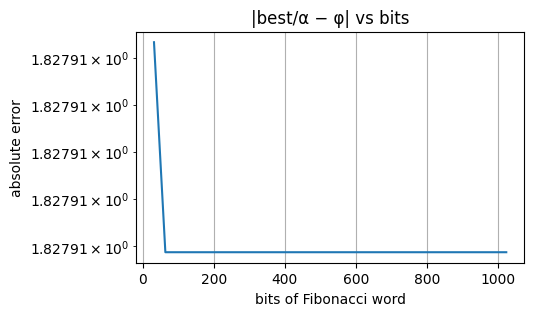

In [7]:

best = F1
bit_grid, err_phi = [], []
for bits in range(32, 1025, 32):
    y = best(fib_word_real(bits))
    err_phi.append(abs(y/alpha - phi))
    bit_grid.append(bits)
plt.figure(figsize=(5,3))
plt.semilogy(bit_grid, err_phi)
plt.title('|best/α − φ| vs bits')
plt.xlabel('bits of Fibonacci word'); plt.ylabel('absolute error')
plt.grid(True); plt.show()


In [8]:

def cascade(z):
    y1 = z/(3**3) + 3   # divide by 3³ and add 3
    y2 = pi * y1
    eps= y2 - 1
    return y1, y2, eps

bits=512
seed = best(fib_word_real(bits))
y1,y2,eps = cascade(seed)
print("seed =", mp.nstr(seed,20))
print("ε after shuffle =", mp.nstr(eps,20))
for k in range(1,6):
    target = mp.mpf(1)/(9**k)
    print(f"k={k}: ε /(1/9^{k}) =", eps/target)


seed = 0.025146241021088330715
ε after shuffle = 8.4277038587715000636
k=1: ε /(1/9^1) = 75.84933472894350057207941056823763070179520870722461943504188878429880168382026258966157460863369077527270783205593295888504108402814100450956955452370551029229952900522249464060714892290671950188389553778877922741696664134107051668946685867156498046
k=2: ε /(1/9^2) = 682.6440125604915051487146951141386763161568783650215749153769990586892151543823633069541714777032169774543704885033966299653697562532690405861259907133495926306957610470024517654643403061604755169550598400990130467526997720696346502052017280440848242
k=3: ε /(1/9^3) = 6143.796113044423546338432256027248086845411905285194174238392991528202936389441269762587543299328952797089334396530569669688327806279421365275133916420146333676261849423022065889179062755444279652595538560891117420774297948626711851846815552396763418
k=4: ε /(1/9^4) = 55294.16501739981191704589030424523278160870714756674756814553692375382642750497142786328788969396057

In [9]:

vec = [1, seed, alpha, phi, sqrt(2), pi, e]
print("PSLQ says:", pslq(vec, maxcoeff=10**6) or "No simple integer relation")


PSLQ says: No simple integer relation
